# **Requirements**

## **Library for Benchmark**

## **The Scratchy Library**

In [50]:
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [51]:
class settings:
    DATA_DIR = "../dataset/"
    TRAIN_PATH = DATA_DIR + "train.csv"
    TEST_PATH = DATA_DIR + "test.csv"
    SUBMISSION_PATH = DATA_DIR + "sample_submission.csv"
    RANDOM_STATE = 42
    LABEL = "reservation_status"

In [52]:
train = pd.read_csv(settings.TRAIN_PATH, index_col="id")
test = pd.read_csv(settings.TEST_PATH, index_col="id")
train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,reservation_status
id,,,,,,,,,,,,,,,,,,,,,
0,Resort Hotel,312,2017,March,10,5,2,5,2,0.0,...,A,0,No Deposit,298.0,NaN,0,Transient-Party,56.0,0,0
1,City Hotel,2,2015,December,51,18,0,2,2,1.0,...,D,1,No Deposit,9.0,NaN,0,Transient,97.0,0,1
2,City Hotel,41,2016,March,14,31,0,3,2,0.0,...,A,0,No Deposit,9.0,NaN,0,Transient,117.9,0,1
3,Resort Hotel,228,2016,August,36,29,2,5,2,0.0,...,D,0,No Deposit,175.0,NaN,0,Transient,86.4,0,1
4,City Hotel,128,2017,May,19,13,0,1,3,0.0,...,A,0,No Deposit,9.0,NaN,0,Transient,144.0,0,1


# **Exploratory Data Analysis**

In [53]:
from IPython.display import display

print("## Dataset Information")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Target variable: {settings.LABEL}")

print("### Target Distribution")
target_dist = train[settings.LABEL].value_counts()
display(target_dist)

target_dist_pct = train[settings.LABEL].value_counts(normalize=True) * 100
print("Target distribution (%):")
display(target_dist_pct.round(2))

print("### Missing Values Analysis")
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
if len(missing_train) > 0:
    print("Missing values in train:")
    display(missing_train)
else:
    print("No missing values found in training data!")

missing_test = test.isnull().sum().sort_values(ascending=False)
missing_test = missing_test[missing_test > 0]
if len(missing_test) > 0:
    print("Missing values in test:")
    display(missing_test)
else:
    print("No missing values found in test data!")

print("### Data Types Summary")
display(train.dtypes.value_counts())

## Dataset Information
Train shape: (94546, 29)
Test shape: (23637, 28)
Target variable: reservation_status
### Target Distribution


reservation_status
1    60133
0    34413
Name: count, dtype: int64

Target distribution (%):


reservation_status
1    63.6
0    36.4
Name: proportion, dtype: float64

### Missing Values Analysis
Missing values in train:


company     89201
agent       12848
country       394
children        4
dtype: int64

Missing values in test:


company    22283
agent       3288
country       90
dtype: int64

### Data Types Summary


int64      15
object     10
float64     4
Name: count, dtype: int64

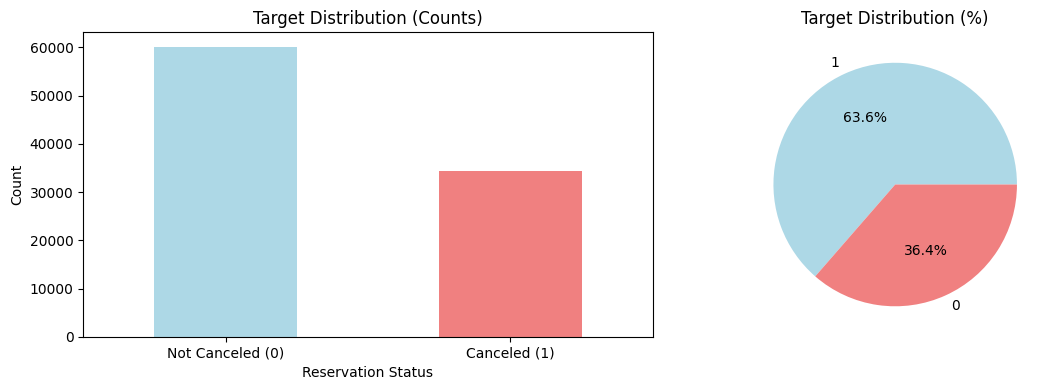

In [54]:
# Visualize target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
train[settings.LABEL].value_counts().plot(kind="bar", color=["lightblue", "lightcoral"])
plt.title("Target Distribution (Counts)")
plt.xlabel("Reservation Status")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Canceled (0)", "Canceled (1)"], rotation=0)

plt.subplot(1, 2, 2)
train[settings.LABEL].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral"]
)
plt.title("Target Distribution (%)")
plt.ylabel("")

plt.tight_layout()
plt.show()

## Statistik Dasar Fitur Numerik
Jumlah fitur numerik: 18
Daftar fitur numerik: lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces
### Ringkasan Statistik Lengkap


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces
count,94546.000000,94546.000000,94546.000000,94546.000000,94546.000000,94546.000000,94546.000000,94542.000000,94546.000000,94546.000000,94546.000000,94546.000000,94546.000000,81698.000000,5345.00000,94546.000000,94546.000000,94546.000000
mean,104.290631,2016.157140,27.217048,15.786072,0.927284,2.501301,1.858418,0.104144,0.007785,0.031889,0.086339,0.141180,0.221141,86.707410,188.51188,2.333795,101.912409,0.063197
std,106.956059,0.706881,13.606756,8.772381,0.997978,1.904134,0.570622,0.398172,0.093372,0.175706,0.828713,1.535869,0.655147,110.772499,131.78330,17.519121,51.314790,0.246985
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.00000,0.000000,-6.380000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.00000,0.000000,69.000000,0.000000
50%,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,178.00000,0.000000,95.000000,0.000000
75%,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.00000,0.000000,126.000000,0.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.00000,391.000000,5400.000000,8.000000


### Statistik Tambahan


,Missing_Count,Missing_Percentage,Unique_Values,Skewness,Kurtosis
lead_time,0,0.00,476,1.35,1.70
arrival_date_year,0,0.00,3,-0.23,-0.99
arrival_date_week_number,0,0.00,53,-0.01,-0.98
arrival_date_day_of_month,0,0.00,31,-0.00,-1.19
stays_in_weekend_nights,0,0.00,17,1.38,7.37
stays_in_week_nights,0,0.00,35,2.89,25.33
adults,0,0.00,12,18.69,1500.02
children,4,0.00,4,4.01,15.61
babies,0,0.00,4,19.53,1026.10
is_repeated_guest,0,0.00,2,5.33,26.39


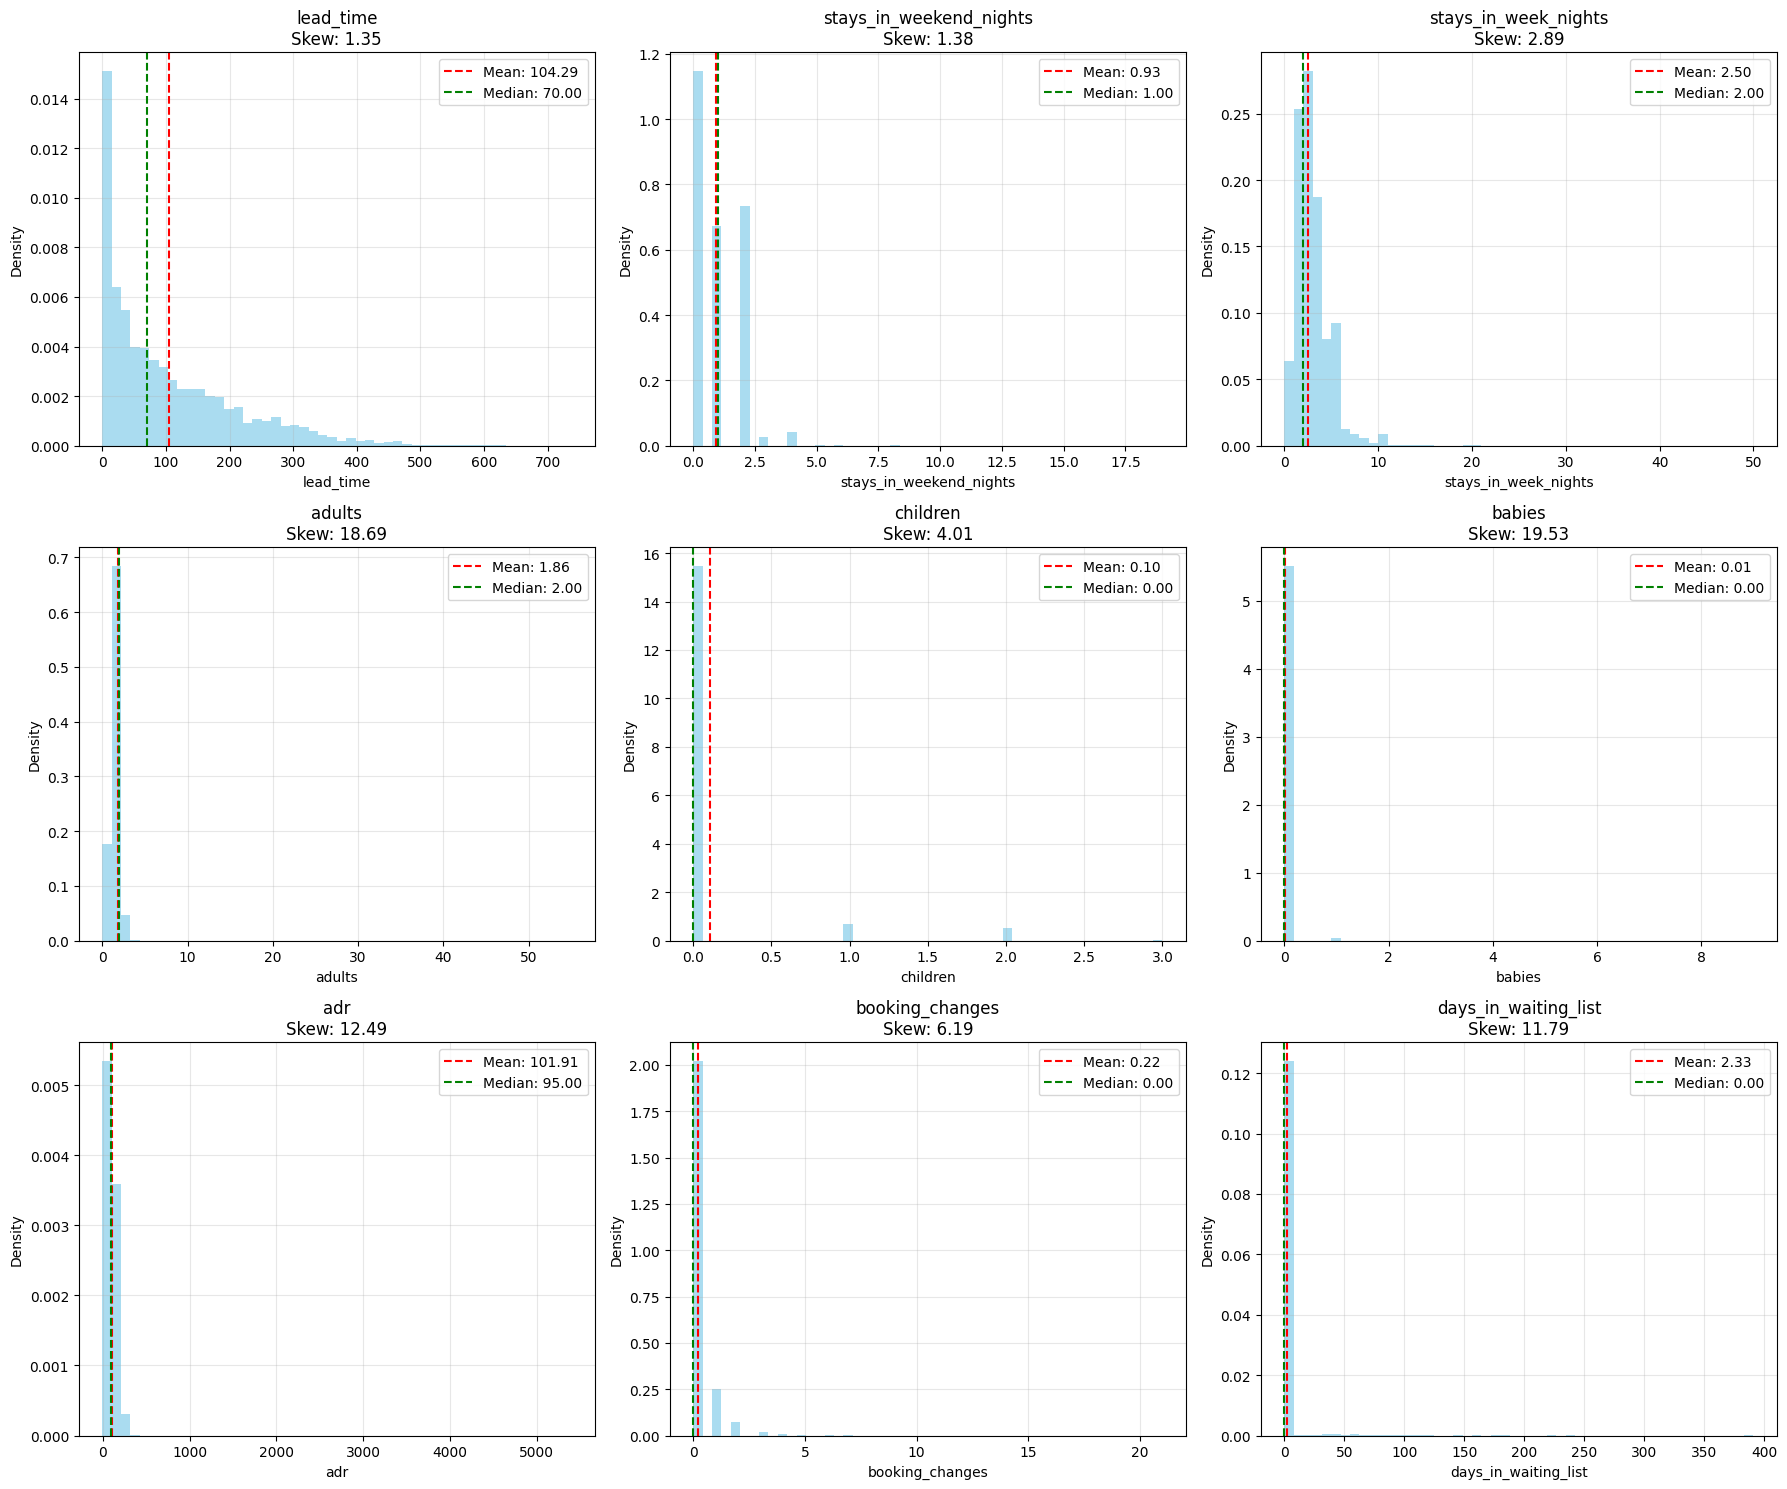

In [55]:
# STATISTIK DASAR - FITUR NUMERIK
print("## Statistik Dasar Fitur Numerik")

numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
if settings.LABEL in numerical_cols:
    numerical_cols.remove(settings.LABEL)

print(f"Jumlah fitur numerik: {len(numerical_cols)}")
print(f"Daftar fitur numerik: {', '.join(numerical_cols)}")

# Detailed statistical summary
print("### Ringkasan Statistik Lengkap")
numerical_stats = train[numerical_cols].describe()
display(numerical_stats)

# Additional statistics
print("### Statistik Tambahan")
additional_stats = pd.DataFrame(
    {
        "Missing_Count": train[numerical_cols].isnull().sum(),
        "Missing_Percentage": (train[numerical_cols].isnull().sum() / len(train)) * 100,
        "Unique_Values": train[numerical_cols].nunique(),
        "Skewness": train[numerical_cols].skew(),
        "Kurtosis": train[numerical_cols].kurtosis(),
    }
).round(2)
display(additional_stats)

# Plot distributions of key numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

key_numerical = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "adr",
    "booking_changes",
    "days_in_waiting_list",
]

for i, col in enumerate(key_numerical):
    if col in train.columns and i < len(axes):
        # Histogram with KDE
        axes[i].hist(
            train[col].dropna(), bins=50, alpha=0.7, density=True, color="skyblue"
        )
        axes[i].axvline(
            train[col].mean(),
            color="red",
            linestyle="--",
            label=f"Mean: {train[col].mean():.2f}",
        )
        axes[i].axvline(
            train[col].median(),
            color="green",
            linestyle="--",
            label=f"Median: {train[col].median():.2f}",
        )
        axes[i].set_title(f"{col}\nSkew: {train[col].skew():.2f}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Density")
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Statistik Dasar Fitur Kategorikal
Jumlah fitur kategorikal: 10
Daftar fitur kategorikal: hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type
### Analisis Fitur Kategorikal


,Feature,Unique_Count,Missing_Count,Missing_Pct,Most_Frequent,Most_Frequent_Count,Most_Frequent_Pct
0,hotel,2,0,0.00,City Hotel,62749,66.37
1,arrival_date_month,12,0,0.00,August,11008,11.64
2,meal,5,0,0.00,BB,73107,77.32
3,country,172,394,0.42,PRT,38214,40.42
4,market_segment,8,0,0.00,Online TA,44751,47.33
5,distribution_channel,5,0,0.00,TA/TO,77574,82.05
6,reserved_room_type,10,0,0.00,A,68008,71.93
7,assigned_room_type,12,0,0.00,A,58575,61.95
8,deposit_type,3,0,0.00,No Deposit,82880,87.66
9,customer_type,4,0,0.00,Transient,70902,74.99


### Distribusi Nilai untuk Setiap Fitur Kategorikal
HOTEL:


,Count,Percentage
hotel,,
City Hotel,62749,66.37
Resort Hotel,31797,33.63


ARRIVAL_DATE_MONTH:


,Count,Percentage
arrival_date_month,,
August,11008,11.64
July,10086,10.67
May,9350,9.89
October,8866,9.38
April,8790,9.30
June,8624,9.12
September,8284,8.76
March,7718,8.16
February,6311,6.68


... dan 2 nilai lainnya
MEAL:


,Count,Percentage
meal,,
BB,73107,77.32
HB,11477,12.14
SC,8385,8.87
Undefined,955,1.01
FB,622,0.66


COUNTRY:


,Count,Percentage
country,,
PRT,38214,40.59
GBR,9614,10.21
FRA,8353,8.87
ESP,6797,7.22
DEU,5874,6.24
ITA,2997,3.18
IRL,2701,2.87
BEL,1872,1.99
BRA,1760,1.87


... dan 162 nilai lainnya
MARKET_SEGMENT:


,Count,Percentage
market_segment,,
Online TA,44751,47.33
Offline TA/TO,19191,20.30
Groups,15705,16.61
Direct,9897,10.47
Corporate,4235,4.48
Complementary,584,0.62
Aviation,181,0.19
Undefined,2,0.00


DISTRIBUTION_CHANNEL:


,Count,Percentage
distribution_channel,,
TA/TO,77574,82.05
Direct,11523,12.19
Corporate,5291,5.60
GDS,153,0.16
Undefined,5,0.01


RESERVED_ROOM_TYPE:


,Count,Percentage
reserved_room_type,,
A,68008,71.93
D,15236,16.11
E,5155,5.45
F,2334,2.47
G,1693,1.79
B,891,0.94
C,723,0.76
H,490,0.52
P,10,0.01


ASSIGNED_ROOM_TYPE:


,Count,Percentage
assigned_room_type,,
A,58575,61.95
D,20074,21.23
E,6177,6.53
F,3005,3.18
G,2072,2.19
C,1847,1.95
B,1694,1.79
H,579,0.61
I,287,0.30


... dan 2 nilai lainnya
DEPOSIT_TYPE:


,Count,Percentage
deposit_type,,
No Deposit,82880,87.66
Non Refund,11544,12.21
Refundable,122,0.13


CUSTOMER_TYPE:


,Count,Percentage
customer_type,,
Transient,70902,74.99
Transient-Party,19967,21.12
Contract,3233,3.42
Group,444,0.47


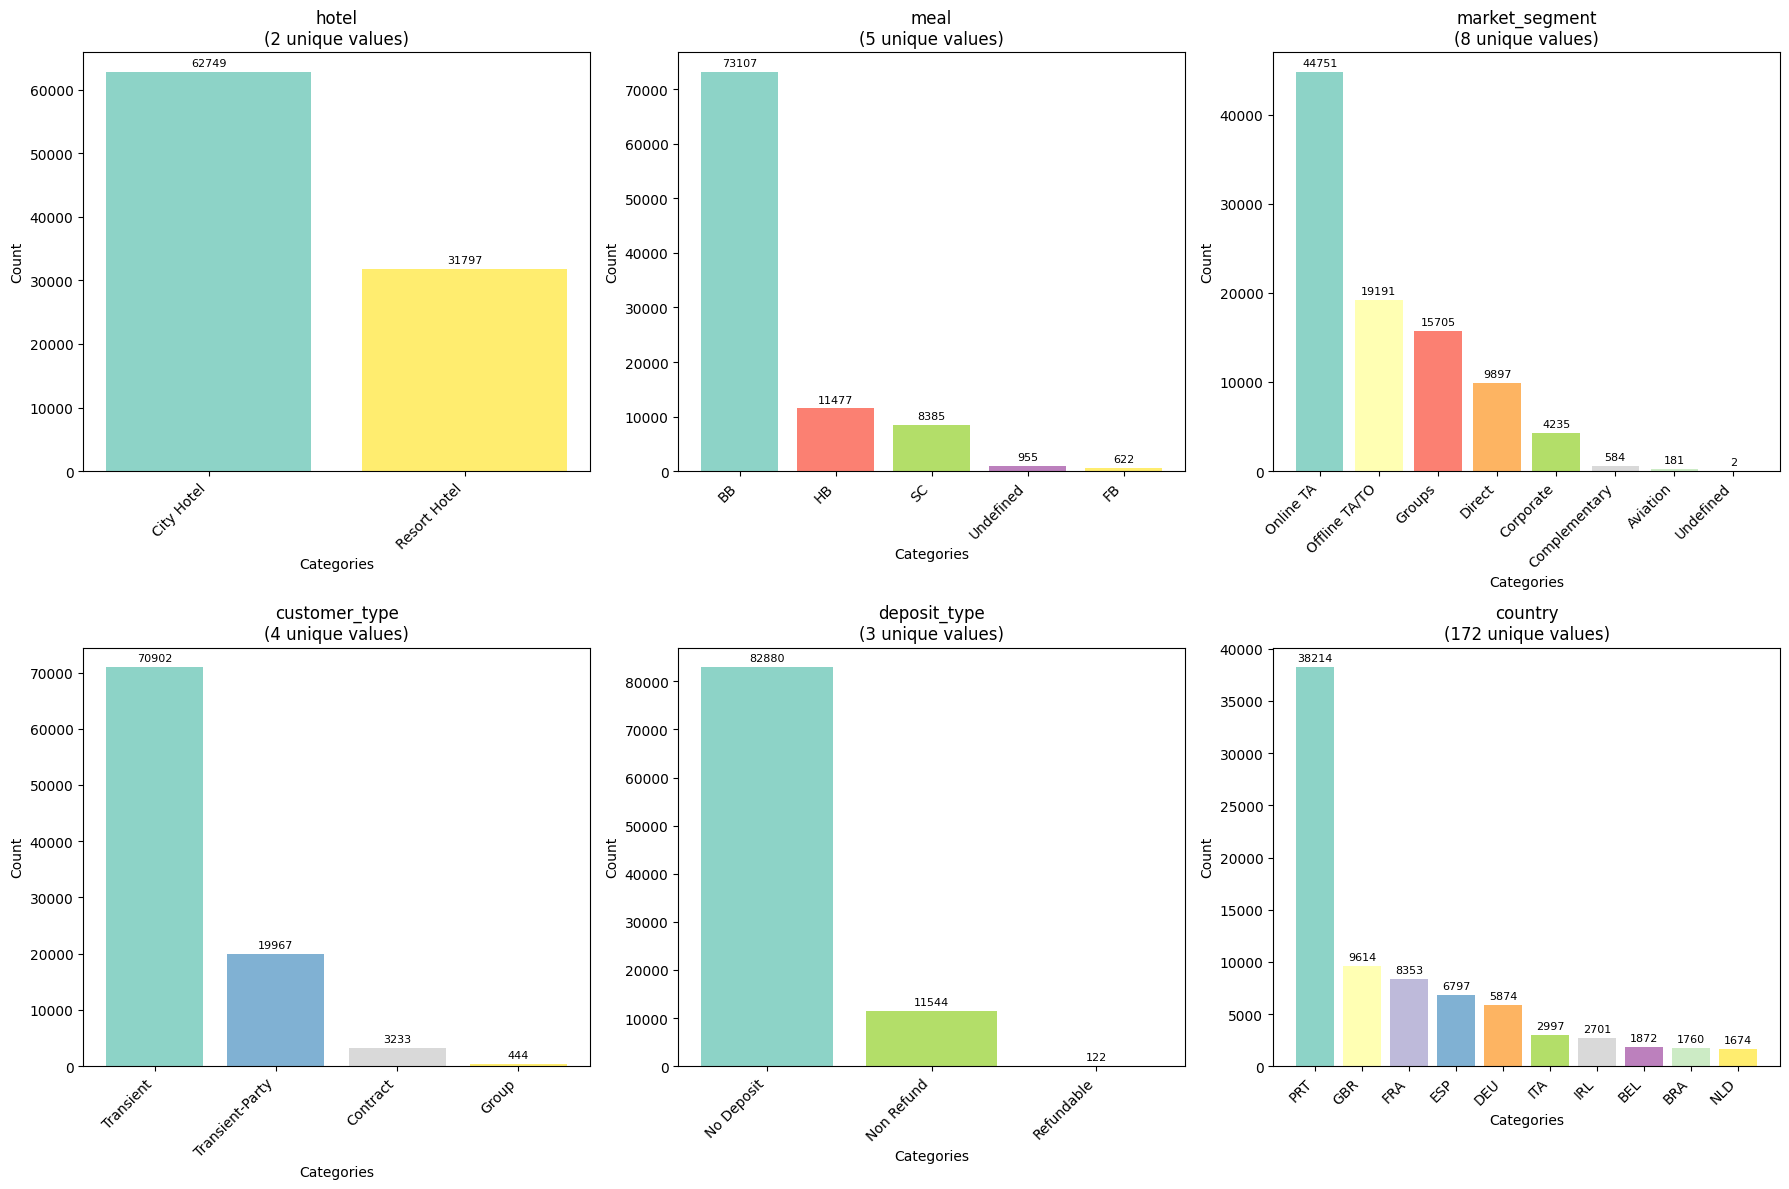

In [56]:
# STATISTIK DASAR - FITUR KATEGORIKAL
print("## Statistik Dasar Fitur Kategorikal")

categorical_cols = train.select_dtypes(include=["object"]).columns.tolist()
print(f"Jumlah fitur kategorikal: {len(categorical_cols)}")
print(f"Daftar fitur kategorikal: {', '.join(categorical_cols)}")

# Detailed categorical analysis
print("### Analisis Fitur Kategorikal")
categorical_summary = []
for col in categorical_cols:
    unique_count = train[col].nunique()
    missing_count = train[col].isnull().sum()
    missing_pct = (missing_count / len(train)) * 100
    most_frequent = train[col].mode()[0] if not train[col].mode().empty else "N/A"
    most_frequent_count = (
        train[col].value_counts().iloc[0] if len(train[col].value_counts()) > 0 else 0
    )
    most_frequent_pct = (most_frequent_count / len(train)) * 100

    categorical_summary.append(
        {
            "Feature": col,
            "Unique_Count": unique_count,
            "Missing_Count": missing_count,
            "Missing_Pct": round(missing_pct, 2),
            "Most_Frequent": most_frequent,
            "Most_Frequent_Count": most_frequent_count,
            "Most_Frequent_Pct": round(most_frequent_pct, 2),
        }
    )

categorical_df = pd.DataFrame(categorical_summary)
display(categorical_df)

# Display value counts for each categorical feature
print("### Distribusi Nilai untuk Setiap Fitur Kategorikal")

for col in categorical_cols:
    print(f"{col.upper()}:")
    value_counts = train[col].value_counts()
    value_pcts = train[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({"Count": value_counts, "Percentage": value_pcts.round(2)})
    display(summary.head(10))  # Show top 10 values

    if len(value_counts) > 10:
        print(f"... dan {len(value_counts) - 10} nilai lainnya")

# Plot key categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

key_categorical = [
    "hotel",
    "meal",
    "market_segment",
    "customer_type",
    "deposit_type",
    "country",
]

for i, col in enumerate(key_categorical):
    if col in train.columns and i < len(axes):
        value_counts = train[col].value_counts().head(10)  # Top 10 values
        colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))

        axes[i].bar(range(len(value_counts)), value_counts.values, color=colors)
        axes[i].set_title(f"{col}\n({train[col].nunique()} unique values)")
        axes[i].set_xlabel("Categories")
        axes[i].set_ylabel("Count")
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha="right")

        # Add count labels on bars
        for j, v in enumerate(value_counts.values):
            axes[i].text(
                j,
                v + max(value_counts.values) * 0.01,
                str(v),
                ha="center",
                va="bottom",
                fontsize=8,
            )

plt.tight_layout()
plt.show()

Karena PRT merupakan mayoritas, maka akan fillna PRT pada kolom country

## Analisis Outlier (Menggunakan IQR Method)


,Feature,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound,Min_Value,Max_Value
0,lead_time,2382,2.52,-196.5,375.5,0.00,737.0
1,stays_in_weekend_nights,200,0.21,-3.0,5.0,0.00,19.0
2,stays_in_week_nights,2655,2.81,-2.0,6.0,0.00,50.0
3,adults,23399,24.75,2.0,2.0,0.00,55.0
4,adr,3012,3.19,-16.5,211.5,-6.38,5400.0
5,booking_changes,14286,15.11,0.0,0.0,0.00,21.0


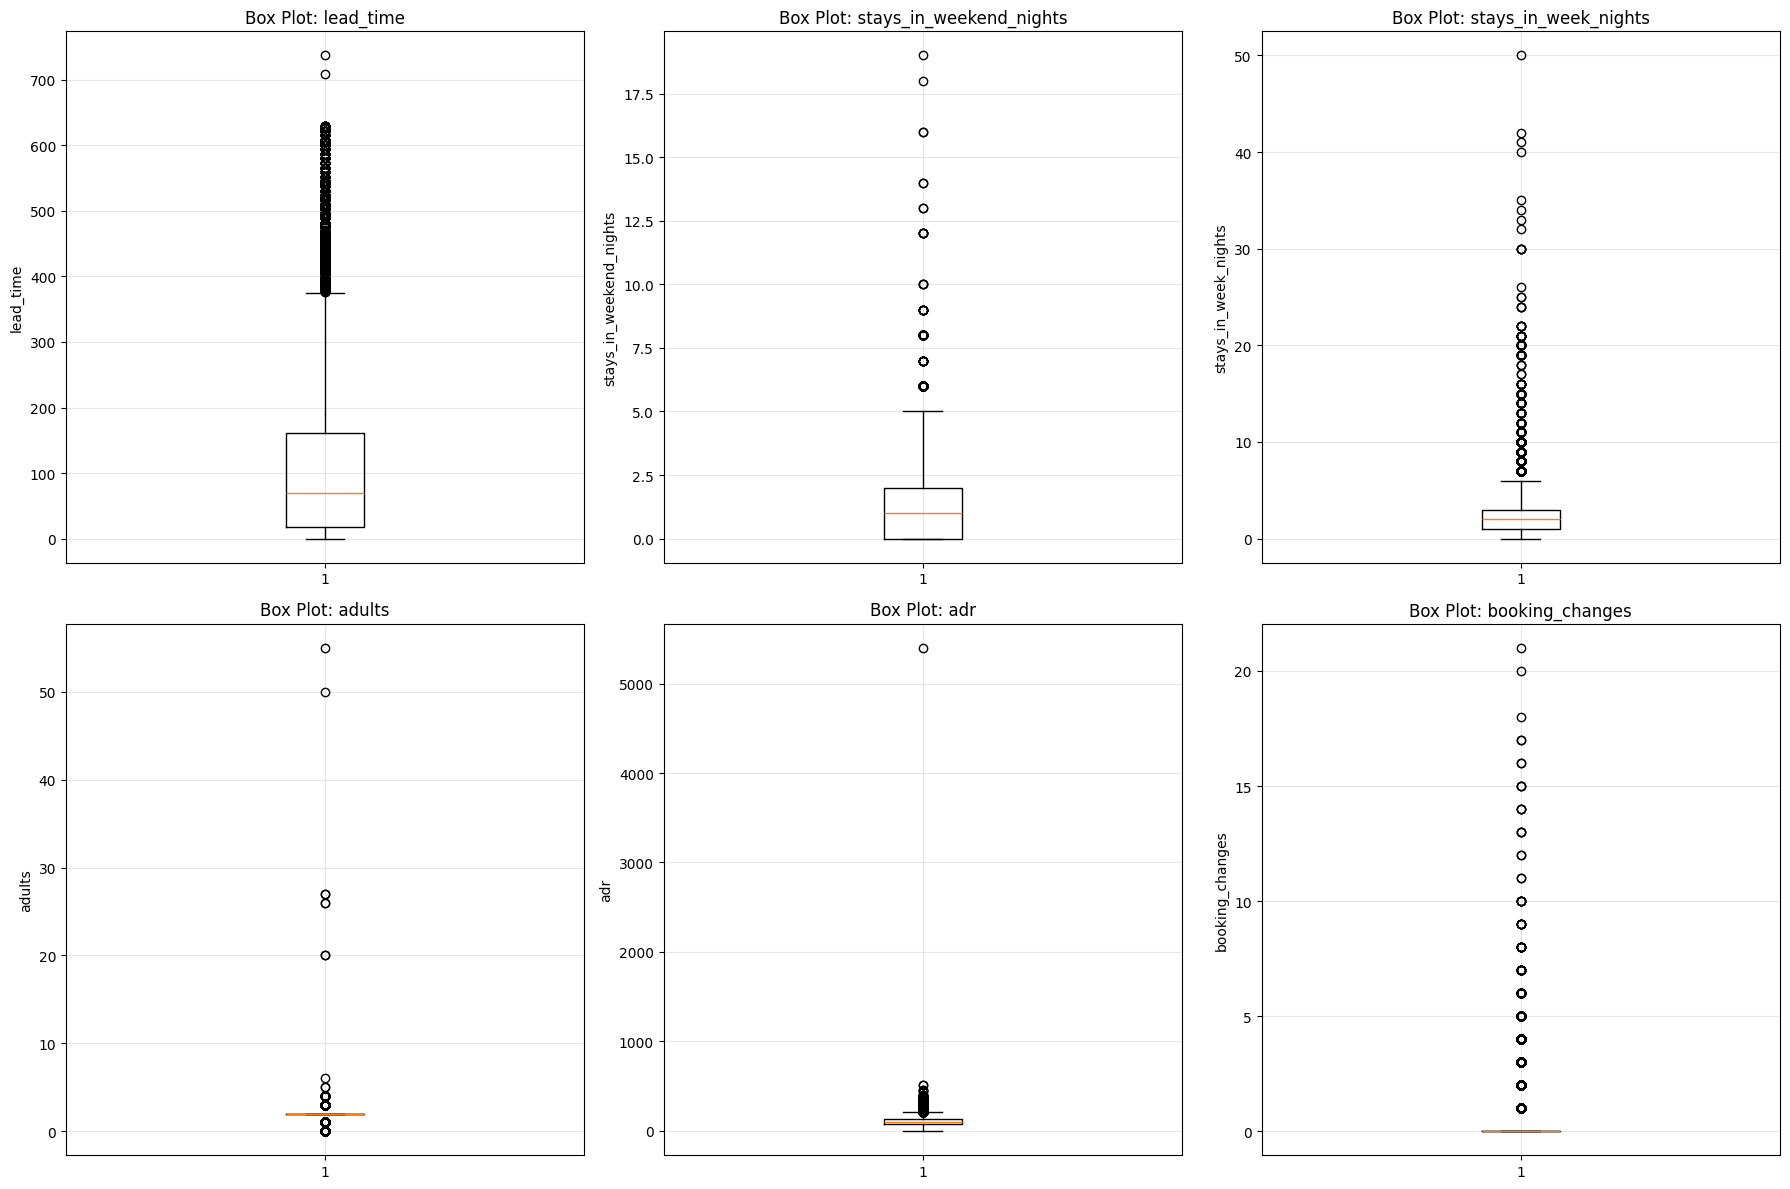

In [57]:
# DETEKSI OUTLIER
print("## Analisis Outlier (Menggunakan IQR Method)")


def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


# Analyze outliers for key numerical features
outlier_summary = []
key_numerical_for_outliers = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "adr",
    "booking_changes",
]

for col in key_numerical_for_outliers:
    if col in train.columns:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(train, col)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(train)) * 100

        outlier_summary.append(
            {
                "Feature": col,
                "Outlier_Count": outlier_count,
                "Outlier_Percentage": round(outlier_percentage, 2),
                "Lower_Bound": round(lower_bound, 2),
                "Upper_Bound": round(upper_bound, 2),
                "Min_Value": train[col].min(),
                "Max_Value": train[col].max(),
            }
        )

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# Visualize outliers with box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(key_numerical_for_outliers):
    if col in train.columns and i < len(axes):
        # Box plot
        axes[i].boxplot(train[col].dropna())
        axes[i].set_title(f"Box Plot: {col}")
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
# ANALISIS SPESIFIK DOMAIN HOTEL BOOKING
print("## Analisis Spesifik Domain Hotel Booking")

# 1. Analisis tingkat pembatalan berdasarkan fitur kunci
print("### 1. Tingkat Pembatalan Berdasarkan Fitur Kunci")

key_features_for_cancellation = [
    "hotel",
    "market_segment",
    "deposit_type",
    "customer_type",
    "meal",
]

for feature in key_features_for_cancellation:
    if feature in train.columns:
        cancellation_rate = (
            train.groupby(feature)[settings.LABEL].agg(["count", "mean"]).round(3)
        )
        cancellation_rate.columns = ["Total_Bookings", "Cancellation_Rate"]
        cancellation_rate = cancellation_rate.sort_values(
            "Cancellation_Rate", ascending=False
        )
        print(f"{feature.upper()}:")
        display(cancellation_rate)

# 2. Analisis lead time vs cancellation
print("### 2. Analisis Lead Time vs Pembatalan")

# Create lead time bins
train["lead_time_bin"] = pd.cut(
    train["lead_time"],
    bins=[0, 30, 60, 120, 365, 1000],
    labels=["0-30 days", "31-60 days", "61-120 days", "121-365 days", ">365 days"],
)

lead_time_analysis = (
    train.groupby("lead_time_bin")[settings.LABEL].agg(["count", "mean"]).round(3)
)
lead_time_analysis.columns = ["Total_Bookings", "Cancellation_Rate"]
display(lead_time_analysis)

# 3. Analisis ADR (Average Daily Rate) vs cancellation
print("### 3. Analisis ADR (Average Daily Rate) vs Pembatalan")

# Create ADR bins
train["adr_bin"] = pd.cut(
    train["adr"],
    bins=[0, 50, 100, 150, 200, 1000],
    labels=["0-50", "51-100", "101-150", "151-200", ">200"],
)

adr_analysis = train.groupby("adr_bin")[settings.LABEL].agg(["count", "mean"]).round(3)
adr_analysis.columns = ["Total_Bookings", "Cancellation_Rate"]
display(adr_analysis)

# 4. Seasonal analysis
print("### 4. Analisis Seasonal (Bulanan)")

seasonal_analysis = (
    train.groupby("arrival_date_month")[settings.LABEL].agg(["count", "mean"]).round(3)
)
seasonal_analysis.columns = ["Total_Bookings", "Cancellation_Rate"]
seasonal_analysis = seasonal_analysis.sort_values("Cancellation_Rate", ascending=False)
display(seasonal_analysis)

# Clean up temporary columns
train.drop(["lead_time_bin", "adr_bin"], axis=1, inplace=True)

## Analisis Spesifik Domain Hotel Booking
### 1. Tingkat Pembatalan Berdasarkan Fitur Kunci
HOTEL:


,Total_Bookings,Cancellation_Rate
hotel,,
Resort Hotel,31797,0.726
City Hotel,62749,0.590


MARKET_SEGMENT:


,Total_Bookings,Cancellation_Rate
market_segment,,
Complementary,584,0.878
Direct,9897,0.857
Corporate,4235,0.826
Aviation,181,0.801
Offline TA/TO,19191,0.663
Online TA,44751,0.639
Groups,15705,0.392
Undefined,2,0.000


DEPOSIT_TYPE:


,Total_Bookings,Cancellation_Rate
deposit_type,,
Refundable,122,0.803
No Deposit,82880,0.723
Non Refund,11544,0.007


CUSTOMER_TYPE:


,Total_Bookings,Cancellation_Rate
customer_type,,
Group,444,0.903
Transient-Party,19967,0.752
Contract,3233,0.698
Transient,70902,0.599


MEAL:


,Total_Bookings,Cancellation_Rate
meal,,
Undefined,955,0.756
HB,11477,0.658
SC,8385,0.639
BB,73107,0.633
FB,622,0.408


### 2. Analisis Lead Time vs Pembatalan


,Total_Bookings,Cancellation_Rate
lead_time_bin,,
0-30 days,25537,0.802
31-60 days,13401,0.644
61-120 days,18329,0.589
121-365 days,29791,0.492
>365 days,2509,0.326


### 3. Analisis ADR (Average Daily Rate) vs Pembatalan


,Total_Bookings,Cancellation_Rate
adr_bin,,
0-50,8006,0.771
51-100,43917,0.618
101-150,27882,0.617
151-200,9253,0.626
>200,3932,0.613


### 4. Analisis Seasonal (Bulanan)


,Total_Bookings,Cancellation_Rate
arrival_date_month,,
January,4663,0.704
November,5427,0.694
March,7718,0.688
February,6311,0.685
December,5419,0.655
July,10086,0.632
August,11008,0.625
October,8866,0.624
September,8284,0.612


## Visualisasi Hubungan Fitur dengan Target


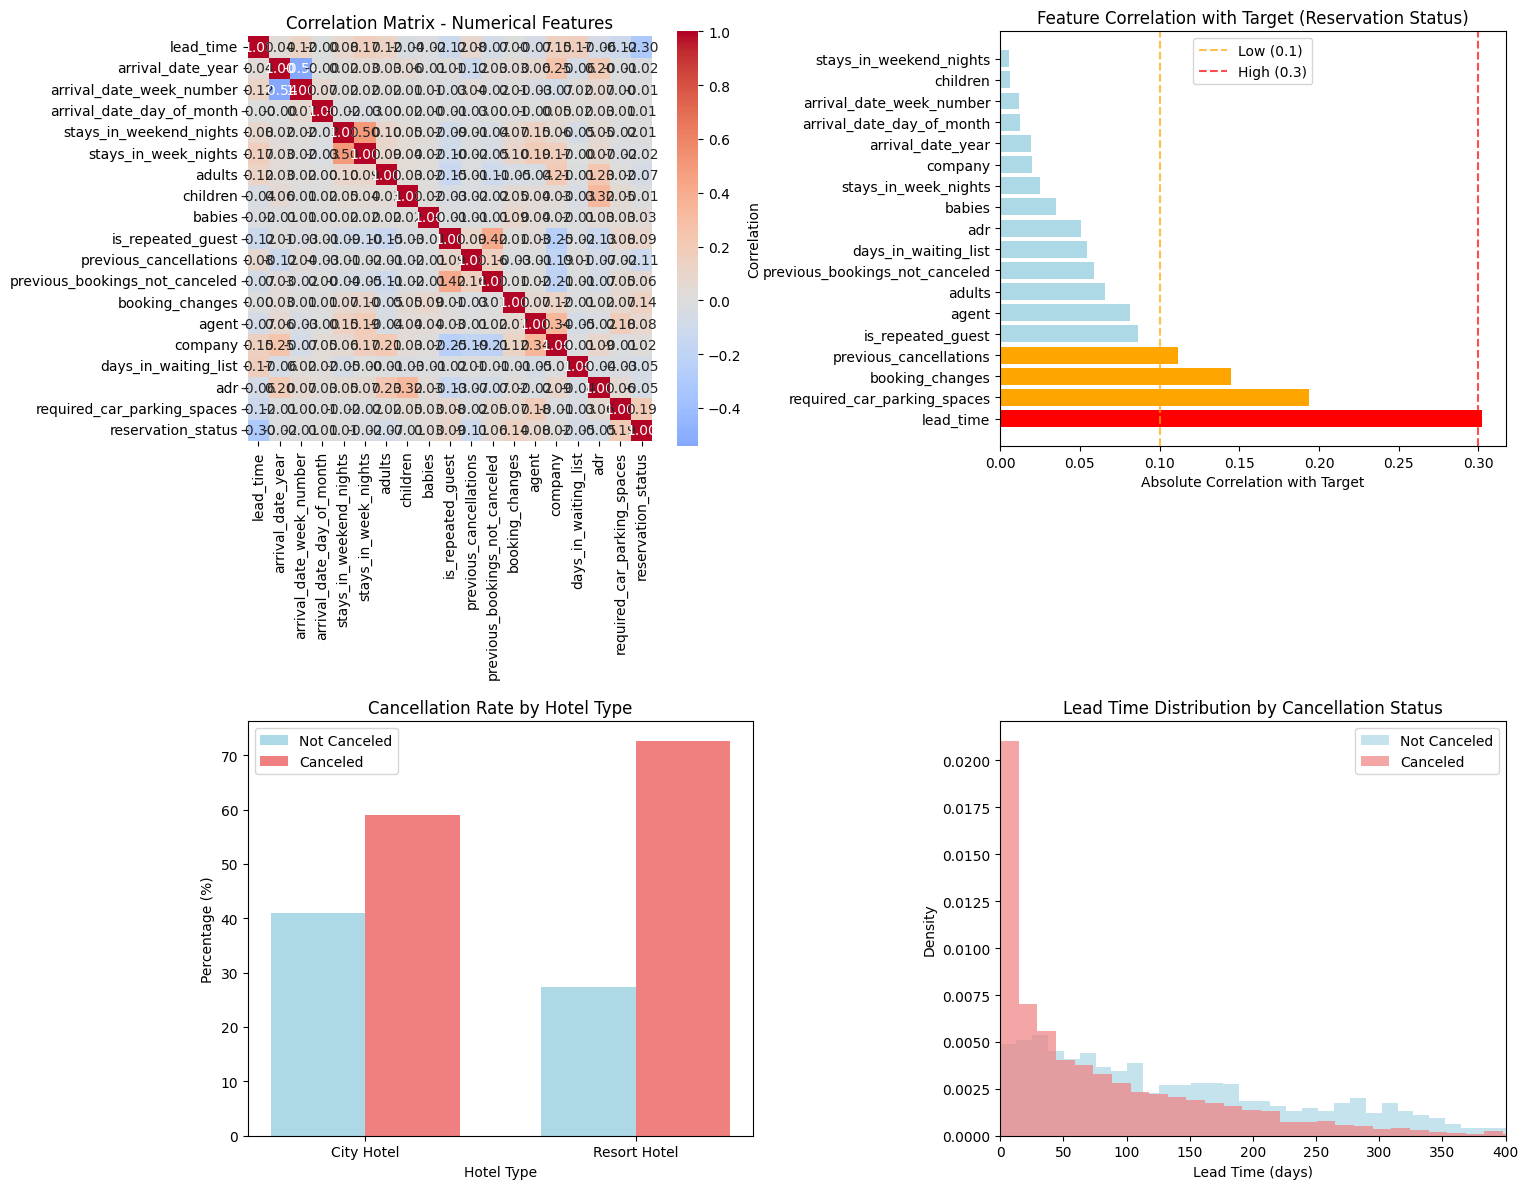

### Ringkasan Perbandingan Canceled vs Not Canceled


,Feature,Not_Canceled_Mean,Canceled_Mean,Difference,Not_Canceled_Std,Canceled_Std
0,lead_time,146.98,79.86,-67.12,118.75,90.98
1,stays_in_weekend_nights,0.92,0.93,0.01,1.00,1.00
2,stays_in_week_nights,2.56,2.47,-0.10,1.85,1.93
3,adults,1.91,1.83,-0.08,0.66,0.51
4,adr,105.35,99.94,-5.41,54.60,49.23


In [59]:
# VISUALISASI HUBUNGAN ANTAR FITUR DAN TARGET
print("## Visualisasi Hubungan Fitur dengan Target")

# Correlation matrix for numerical features
numerical_cols_with_target = [*numerical_cols, settings.LABEL]
correlation_matrix = train[numerical_cols_with_target].corr()

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
import seaborn as sns

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"label": "Correlation"},
)
plt.title("Correlation Matrix - Numerical Features")
plt.tight_layout()

# Feature importance visualization based on correlation with target
plt.subplot(2, 2, 2)
target_corr = (
    correlation_matrix[settings.LABEL].abs().sort_values(ascending=False)[1:]
)  # Exclude target itself
colors = [
    "red" if x > 0.3 else "orange" if x > 0.1 else "lightblue"
    for x in target_corr.values
]
plt.barh(range(len(target_corr)), target_corr.values, color=colors)
plt.yticks(range(len(target_corr)), target_corr.index)
plt.xlabel("Absolute Correlation with Target")
plt.title("Feature Correlation with Target (Reservation Status)")
plt.axvline(x=0.1, color="orange", linestyle="--", alpha=0.7, label="Low (0.1)")
plt.axvline(x=0.3, color="red", linestyle="--", alpha=0.7, label="High (0.3)")
plt.legend()

# Distribution comparison for high-impact categorical features
plt.subplot(2, 2, 3)
# Hotel type vs cancellation
hotel_cancel = train.groupby(["hotel", settings.LABEL]).size().unstack(fill_value=0)
hotel_cancel_pct = hotel_cancel.div(hotel_cancel.sum(axis=1), axis=0) * 100

x_pos = np.arange(len(hotel_cancel_pct.index))
width = 0.35

plt.bar(
    x_pos - width / 2,
    hotel_cancel_pct[0],
    width,
    label="Not Canceled",
    color="lightblue",
)
plt.bar(
    x_pos + width / 2, hotel_cancel_pct[1], width, label="Canceled", color="lightcoral"
)

plt.xlabel("Hotel Type")
plt.ylabel("Percentage (%)")
plt.title("Cancellation Rate by Hotel Type")
plt.xticks(x_pos, hotel_cancel_pct.index)
plt.legend()

# Lead time distribution by cancellation status
plt.subplot(2, 2, 4)
canceled_lead_time = train[train[settings.LABEL] == 1]["lead_time"]
not_canceled_lead_time = train[train[settings.LABEL] == 0]["lead_time"]

plt.hist(
    not_canceled_lead_time,
    bins=50,
    alpha=0.7,
    label="Not Canceled",
    density=True,
    color="lightblue",
)
plt.hist(
    canceled_lead_time,
    bins=50,
    alpha=0.7,
    label="Canceled",
    density=True,
    color="lightcoral",
)
plt.xlabel("Lead Time (days)")
plt.ylabel("Density")
plt.title("Lead Time Distribution by Cancellation Status")
plt.legend()
plt.xlim(0, 400)  # Focus on reasonable lead times

plt.tight_layout()
plt.show()

# Summary statistics comparison
print("### Ringkasan Perbandingan Canceled vs Not Canceled")

comparison_features = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "adr",
]
comparison_stats = []

for feature in comparison_features:
    if feature in train.columns:
        canceled = train[train[settings.LABEL] == 1][feature]
        not_canceled = train[train[settings.LABEL] == 0][feature]

        comparison_stats.append(
            {
                "Feature": feature,
                "Not_Canceled_Mean": round(not_canceled.mean(), 2),
                "Canceled_Mean": round(canceled.mean(), 2),
                "Difference": round(canceled.mean() - not_canceled.mean(), 2),
                "Not_Canceled_Std": round(not_canceled.std(), 2),
                "Canceled_Std": round(canceled.std(), 2),
            }
        )

comparison_df = pd.DataFrame(comparison_stats)
display(comparison_df)

# **Data Preprocessing**

In [60]:
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


class FeatureImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # Create a copy to avoid modifying original data
        for col in ["agent", "company"]:
            if col in X.columns:
                imputer = SimpleImputer(strategy="median")
                X[col] = imputer.fit_transform(X[[col]]).ravel()

        if "children" in X.columns:
            imputer = SimpleImputer(strategy="constant", fill_value=0)
            X["children"] = imputer.fit_transform(X[["children"]]).ravel()

        # change the missing values with the most frequent
        if "country" in X.columns:
            X["country"].fillna("PRT", inplace=True)

        # Check which features still contain null values
        null_columns = X.columns[X.isnull().any()]
        if len(null_columns) > 0:
            print("Remaining null columns:", X[null_columns].isnull().sum())
        return X


class FeatureCreator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['stay'] = X['stays_in_week_nights'] + X['stays_in_weekend_nights']
        X['all_guest'] = X['adults'] + X['children'] + X['babies']

        X['adr'] = X['adr'].apply(lambda x: x if x is None or x >= 0 else -x)

        #Fill 'undefined' values with the most frequent category
        X['meal'] = X['meal'].replace('Undefined', 'BB')
        X['distribution_channel'] = X['distribution_channel'].replace('Undefined', 'TA/TO')
        X['market_segment'] = X['market_segment'].replace('Undefined', 'Online T')

        # Check for zero/negative values
        if any(X['lead_time'] <= 0):
            # Shift the values to make them positive (add a small constant to avoid zero)
            min_value = X['lead_time'].min()
            if min_value <= 0:
                X['lead_time'] = X['lead_time'] - min_value + 1e-5

        # Apply the Box-Cox transformation
        transformed_data, lambda_value_1 = stats.boxcox(X['lead_time'])

        # Create a new DataFrame with the transformed data
        X['lead_time_transform'] = transformed_data

        return X


class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # Create a copy to avoid modifying original data

        cols_to_drop = ["company", "babies", "stays_in_weekend_nights", "arrival_date_month"]
        existing_cols_to_drop = [col for col in cols_to_drop if col in X.columns]

        if existing_cols_to_drop:
            X = X.drop(columns=existing_cols_to_drop)

        return X


class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_encoded = X.copy()

        cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

        for col in cat_cols:
            if col in ["customer_type", "deposit_type", "hotel"]:
                le = LabelEncoder()
                X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
            else:
                # Perform one-hot encoding
                dummies = pd.get_dummies(X_encoded[col], prefix=col)
                X_encoded = pd.concat([X_encoded, dummies], axis=1)
                # Drop original categorical columns from DataFrame
                X_encoded.drop(col, axis=1, inplace=True)

        return X_encoded


class NoBooleanEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_encoded = X.copy()

        bool_cols = X.select_dtypes(include=["bool"]).columns.tolist()

        for col in bool_cols:
            X_encoded[col] = X_encoded[col].astype(int)

        return X_encoded


pipeline = Pipeline([
    ("imputer", FeatureImputer()),
    ("featurecreator", FeatureCreator()),
    ("dropper", FeatureDropper()),
    ("encoder", FeatureEncoder()),
    ("noboolean", NoBooleanEncoder())
])

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import StratifiedKFold, train_test_split

sys.path.append(".")
from sklearn.ensemble import RandomForestClassifier as SKRandomForestClassifier
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.naive_bayes import GaussianNB as SKNaiveBayesClassifier
from sklearn.svm import SVC as SKSVM
from sklearn.tree import DecisionTreeClassifier as SKDecisionTreeClassifier

from supervised_learning.classifier import (
    SVM,
    DecisionTreeClassifier,
    LogisticRegression,
    NaiveBayesClassifier,
    RandomForestClassifier,
)

from unsupervised_learning import DBSCAN

train = train.sample(frac=0.05, random_state=settings.RANDOM_STATE).reset_index(drop=True)
X, y = train.drop(columns=[settings.LABEL]), train[settings.LABEL]
clusterer = DBSCAN(eps=3, min_samples=5)

# Apply clustering sebelum di-split
X['cluster'] = clusterer.fit_predict(X[[col for col in X.columns if X[col].dtype in [np.int64, np.float64] and X[col].isna().sum() == 0]])


# Holdout validation
def holdout_validation(model, X, y, test_size=0.2, random_state=settings.RANDOM_STATE):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    # if logistic regression, scale the data
    if isinstance(model, LogisticRegression) or isinstance(model, NaiveBayesClassifier) or isinstance(model, SVM) or isinstance(model, SKLogisticRegression) or isinstance(model, SKNaiveBayesClassifier) or isinstance(model, SKSVM):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")


def skfold_cross_validation(model, X, y, n_splits=5, random_state=settings.RANDOM_STATE):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    accuracies = []
    f1_scores = []

    for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        accuracies.append(acc)
        f1_scores.append(f1)

        print(f"Fold {fold + 1}: Accuracy = {acc:.4f}, F1 Score = {f1:.4f}")

    print(f"\nMean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Mean F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

# **Modeling**

Menggunakan F1-Score karena sangat cocok untuk kasus data imbalance.

In [62]:
import importlib

# Reload modules to get the latest changes
if 'supervised_learning.classifier' in sys.modules:
    importlib.reload(sys.modules['supervised_learning.classifier'])
if 'supervised_learning.classifier.decision_tree' in sys.modules:
    importlib.reload(sys.modules['supervised_learning.classifier.decision_tree'])

# Import ANN directly 
sys.path.append(".")
from supervised_learning.ann.ann import NeuralNetwork

models = {
    "Support Vector Machine": SVM(),
    "SKSVM": SKSVM(),
    "Logistic Regression": LogisticRegression(),
    "SKLogistic Regression": SKLogisticRegression(),
    "Naive Bayes": NaiveBayesClassifier(),
    "SKNaive Bayes": SKNaiveBayesClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SKDecision Tree": SKDecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SKRandom Forest": SKRandomForestClassifier(),
    "Neural Network": NeuralNetwork(
        hidden_layers=[64, 32],
        activations=["relu", "relu"],
        output_activation="sigmoid",
        loss_function="binary_cross_entropy",
        optimizer="adam",
        learning_rate=0.001,
        epochs=200,
        batch_size=64,
        random_state=settings.RANDOM_STATE,
        verbose=True
    ),
}

for model_name, model in models.items():
    print(f"### Evaluating {model_name} with Holdout Validation")
    X_pipeline = pipeline.fit_transform(X)
    holdout_validation(model, X_pipeline, y)
    print("\n" + "=" * 50 + "\n")

### Evaluating Support Vector Machine with Holdout Validation
Confusion Matrix:
[[108 236]
 [  1 601]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.31      0.48       344
           1       0.72      1.00      0.84       602

    accuracy                           0.75       946
   macro avg       0.85      0.66      0.66       946
weighted avg       0.82      0.75      0.70       946

Accuracy: 0.7495
F1 Score: 0.8353


### Evaluating SKSVM with Holdout Validation
Confusion Matrix:
[[190 154]
 [ 41 561]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.55      0.66       344
           1       0.78      0.93      0.85       602

    accuracy                           0.79       946
   macro avg       0.80      0.74      0.76       946
weighted avg       0.80      0.79      0.78       946

Accuracy: 0.7939
F1 Score: 0.8519


### Evaluating Logistic Regression wi